### Download and prepare the data. Explain the procedure.

In [10]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import shuffle

from sklearn.preprocessing import OrdinalEncoder 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/datasets/Churn.csv')

In [11]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [12]:
#Eliminating RowNumber column, since I have already indexes I don't want this column to distorce my model.
data = data.drop('RowNumber', axis=1)

In [13]:
#Renaming columns with lowercases.
data.columns=(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure','balance','num_of_products', 'has_cr_card','is_active_member','estimated_salary','exited'])

In [14]:
display(data)

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [15]:
#General information about dataset.

print(data.shape)
print()
print('The dataset has {0}'.format(data.shape[0]), 'rows')
print()
print('The dataset has {0}'.format(data.shape[1]), 'columns')
print()
print('The dataset has {0}'.format(data.duplicated().sum()), 'duplicates')

(10000, 13)

The dataset has 10000 rows

The dataset has 13 columns

The dataset has 0 duplicates


In [16]:
print('NaN in the whole dataset are:')
print(data.isna().sum())

NaN in the whole dataset are:
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


In [17]:
print(data.describe())

        customer_id  credit_score           age       tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  9091.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800     4.997690   76485.889288   
std    7.193619e+04     96.653299     10.487806     2.894723   62397.405202   
min    1.556570e+07    350.000000     18.000000     0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000     2.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000     5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000     7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000    10.000000  250898.090000   

       num_of_products  has_cr_card  is_active_member  estimated_salary  \
count     10000.000000  10000.00000      10000.000000      10000.000000   
mean          1.530200      0.70550          0.515100     100090.239881   
std           0.581654      0.45584          0.499797      5751

In [18]:
#Investigating columns values.
#Customer_id column.
print('customer_id column:')
print(data.customer_id.value_counts(dropna=False))
print()
print('The number of unique value is:', data.customer_id.nunique())
print()
#Surname column.
print('surname column:')
print(data.surname.value_counts(dropna=False))
print()
print('The number of unique value is:', data.surname.nunique())
print()
#credit_score column.
print('credit_score column:')
print(data.credit_score.value_counts(dropna=False))
print()
print('The number of unique value is:', data.credit_score.nunique())
print()
#Geography column.
print('geography column:')
print(data.geography.value_counts(dropna=False))
print()
print('The number of unique value is:', data.geography.nunique())
print()
print('Going to Hot-Encode this column in the next step.')
print()
#Gender column.
print('gender column:')
print(data.gender.value_counts(dropna=False))
print()
print('The number of unique value is:', data.gender.nunique())
print()
print('Going to Hot-Encode this column in the next step.')
print()
#Age column.
print('age column:')
print(data.age.value_counts(dropna=False))
print()
print('The number of unique value is:', data.age.nunique())
print()
#Tenure column.
print('tenure column:')
print(data.tenure.value_counts(dropna=False))
print()
print('The number of unique value is:', data.tenure.nunique())
print()
print('909 NaN, I decided that I will impose all None values as zeros.')
print()
#Balance column.
print('balance column:')
print(data.balance.value_counts(dropna=False))
print()
print('The number of unique value is:', data.balance.nunique())
print()
#Nun_of_products column.
print('num_of_product column:')
print(data.num_of_products.value_counts(dropna=False))
print()
print('The number of unique value is:', data.num_of_products.nunique())
print()
#Has_CR_Card column.
print('has_cr_card column:')
print(data.has_cr_card.value_counts(dropna=False))
print()
print('The number of unique value is:', data.has_cr_card.nunique())
print()
#Is_active_member column.
print('is_active_member column:')
print(data.is_active_member.value_counts(dropna=False))
print()
print('The number of unique value is:', data.is_active_member.nunique())
print()
#Estimated_salary column.
print('estimated_salary column:')
print(data.estimated_salary.value_counts(dropna=False))
print()
print('The number of unique value is:', data.estimated_salary.nunique())
print()
#Exited column.
print('exited column:')
print(data.exited.value_counts(dropna=False))
print()
print('The number of unique value is:', data.exited.nunique())

customer_id column:
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: customer_id, Length: 10000, dtype: int64

The number of unique value is: 10000

surname column:
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Nickson      1
Vanmeter     1
Overby       1
Hardacre     1
Sholes       1
Name: surname, Length: 2932, dtype: int64

The number of unique value is: 2932

credit_score column:
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: credit_score, Length: 460, dtype: int64

The number of unique value is: 460

geography column:
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

The number of unique value is: 3

Going to Hot-Encode this column in the next step.

gender column:
Male      5457
Female    4543
Name: gender, dtype: int64


In [19]:
#Data preprocessing 
#Transforming NaN values in tenure column to zeros.
data.tenure = data.tenure.fillna(0)
print(data.tenure.value_counts(dropna=False))

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: tenure, dtype: int64


In [20]:
#One-Hot-Encoding of gender and geography columns.
encoder = OrdinalEncoder()
data_encoded = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)
data.gender = data_encoded.gender
data.geography = data_encoded.geography
data.gender = data.gender.astype('int16')
data.geography = data.geography.astype('int16')

In [21]:
display(data)

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,0,0,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,1,39,5.0,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,0,1,35,10.0,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,0,0,36,7.0,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,1,1,42,3.0,75075.31,2,1,0,92888.52,1


In [22]:
#Creating a target variable.
y_true = data.exited.values

#Printing how the variable itself + len of the variable.
print(y_true)
print()
print(len(y_true)) #Should return the len of the starting dataframe.

[1 0 1 ... 1 1 0]

10000


# Brief summarize. Download and prepare the data.

I open the Churn file, saving it in a DataFrame variable. The datataset is composed by:
- RowNumber — data string index 
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary
- Exited — сustomer has left

First thing I've done in the dataset was renaming columns in lowercases and removing RowNumber column, I don't need that since it's just the same as indexes. I don't want those values to distorce my analysis. My dataset dataframe has 10.000 rows and 13 columns, 0 duplicates and 909 NaN, they're all in 'tenure' column.

The choice tooken in handling None values was assign them zeros, since they represent no interests.
After that, I though was a good idea to encode gender and geography to consider them in the algorithim, in my opinion, those features can alterate the result even if sightly.

### Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

In [23]:
#Examinate the interested target column.
print('The number of non-exited customers is:', data.exited.loc[data.exited == 0].count())
print()
print('The number of exited customers is:', data.exited.loc[data.exited == 1].count())
print()
print('The percentage of non-exited customers is:', (len(data.exited.loc[data.exited == 0])/len(data.exited)*100),'%')
print()
print('The percentage of exited customers is:', (len(data.exited.loc[data.exited == 1])/len(data.exited)*100),'%')
print()

The number of non-exited customers is: 7963

The number of exited customers is: 2037

The percentage of non-exited customers is: 79.63 %

The percentage of exited customers is: 20.369999999999997 %



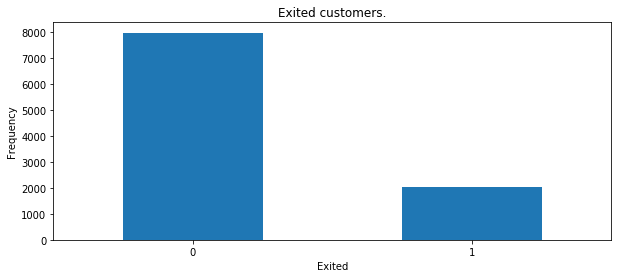

In [24]:
#PLOTTING THE TARGET.
count_target = pd.value_counts(data.exited, sort=True)
plt.figure(figsize=(10,4))
count_target.plot(kind='bar', rot=0)
plt.title('Exited customers.')
plt.xlabel('Exited')
plt.ylabel('Frequency')
plt.show()

In [25]:
#Understanding the shape of the imbalance.
exited = data[data['exited']==1]
non_exited = data[data['exited']==0]
print(exited.shape)
print(non_exited.shape)

(2037, 13)
(7963, 13)


In [26]:
# Splitting the data into train and test.
data_train, data_test = train_test_split(data, stratify=y_true, test_size=0.2, random_state=80)
#Splitting the training dataset into train validation and cross validation.
data_train, data_valid = train_test_split(data_train, test_size=0.25, random_state=80)

In [27]:
print('Number of records in training dataset:', data_train.shape[0])
print('Number of records in cross validation dataset:', data_valid.shape[0])
print('Number of records in the test dataset:', data_test.shape[0])
print('')
print('Train and Cross validation dataset are going to be used to build the model itself.')
print('Test is going to check the accuracy of our model output.')

Number of records in training dataset: 6000
Number of records in cross validation dataset: 2000
Number of records in the test dataset: 2000

Train and Cross validation dataset are going to be used to build the model itself.
Test is going to check the accuracy of our model output.


In [28]:
print('To make sure that our testing is going to have a positive result,')
print('We can save the column exited in a variable to be able, to compare that to the model results obtained.')

checking_values = data_test.exited #This is going to become the array to check the accuracy of our model.

print('checking_values is an array with', len(checking_values),'values.')

To make sure that our testing is going to have a positive result,
We can save the column exited in a variable to be able, to compare that to the model results obtained.
checking_values is an array with 2000 values.


In [29]:
#Creating features and targets for our model.
features_train = data_train.drop(['exited','surname'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited','surname'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited','surname'], axis=1)
target_test = data_test['exited']

In [30]:
#Let's take a look to the distribution of is_ultra column in the three dataset.
#The importance of this step, lies in the fact, that we should make sure, that everyone of our datasets (train,test,cv) 
#has at least a 17% of exited in it. Our initial rate of percentage is 80/20 (whole dataset)
#Otherwise the prediction of our model are going to be distorted.
#To change this split is just necessary changing random_state parameter in train_test_split function.

train_exited_distribution = data_train['exited'].value_counts(normalize=True)
cv_exited_distribution = data_valid['exited'].value_counts(normalize=True)
test_exited_distribution =  checking_values.value_counts(normalize=True)

print('Train dataset:')
print(train_exited_distribution)
print()
print('Validation dataset:')
print(cv_exited_distribution)
print()
print('Testing array:')
print(test_exited_distribution)
print()
print('Our train, test and cv datasets, correspond almost perfectly to the whole dataset.')

Train dataset:
0    0.793
1    0.207
Name: exited, dtype: float64

Validation dataset:
0    0.806
1    0.194
Name: exited, dtype: float64

Testing array:
0    0.7965
1    0.2035
Name: exited, dtype: float64

Our train, test and cv datasets, correspond almost perfectly to the whole dataset.


In [31]:
print('Since we need a classification model, going to implement a Classifier model.')
print()
print('Our choice is going to be one from DecisionTreeClassifier / RandomForestClassifier / LogisticRegression')
print()
print('Since RFC has an higher accuracy then DTC, going to discard DecisionTreeClassifier from my choices.')

Since we need a classification model, going to implement a Classifier model.

Our choice is going to be one from DecisionTreeClassifier / RandomForestClassifier / LogisticRegression

Since RFC has an higher accuracy then DTC, going to discard DecisionTreeClassifier from my choices.


In [22]:
#Training unbalanced dataset with LogisticRegression.
#Finding accuracy values for LogisticRegression

model = LogisticRegression(random_state=80, solver='liblinear', max_iter=100)
model.fit(features_train, target_train) # < train the model >
predictions_valid = model.predict(features_valid) 

acc_logistic = accuracy_score(target_valid, predictions_valid)
rmse_logistic = mean_squared_error(target_valid, predictions_valid)**0.5
f1_score_logistic = f1_score(target_valid, predictions_valid)
precision_logistic = precision_score(target_valid, predictions_valid)
recall_logistic = recall_score(target_valid, predictions_valid)
print("Logistic regression rmse:", rmse_logistic) 
print('Logistic regression accuracy:', acc_logistic)
print('Logistic regression precision:', precision_logistic)
print('Logistic regression recall:', recall_logistic)
print('Logistic regression f1 score:',f1_score_logistic)

Logistic regression rmse: 0.4404543109109048
Logistic regression accuracy: 0.806
Logistic regression precision: 0.0
Logistic regression recall: 0.0
Logistic regression f1 score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# Training unbalanced dataset with RandomForestClassifier.
#Finding Accuracy, precision, recall and f1 score for RandomForestClassifier, criterion=gini with random n_estimator
acc_result=[]
f1_result=[]

for estim in range(10, 100, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=10, random_state=8)
        model.fit(features_train, target_train) # < train the model >
        predictions_valid = model.predict(features_valid) 
        # < write code here >
        
        acc = accuracy_score(target_valid, predictions_valid)
        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        precision = precision_score(target_valid, predictions_valid)
        recall = recall_score(target_valid, predictions_valid)
        f1 = f1_score(target_valid, predictions_valid)
        print("n_estimators =", estim, "Rmse:", rmse)
        print('n_estimators =', estim, 'Accuracy:', acc)
        print('n_estimators =', estim, 'Precision:', precision)
        print('n_estimators =', estim, 'Recall:', recall)
        print('n_estimators =', estim, 'F1 Score:', f1)
        acc_result.append(acc)
        f1_result.append(f1)
        print()
        
print('The best possible accuracy obtained tuning this hyperparameter is :', max(acc_result))
print('The best possible f1 score obtained tuning this hyperparameter is :', max(f1_result))

n_estimators = 10 Rmse: 0.3761648574760805
n_estimators = 10 Accuracy: 0.8585
n_estimators = 10 Precision: 0.7419354838709677
n_estimators = 10 Recall: 0.41494845360824745
n_estimators = 10 F1 Score: 0.5322314049586777

n_estimators = 20 Rmse: 0.37080992435478316
n_estimators = 20 Accuracy: 0.8625
n_estimators = 20 Precision: 0.7627906976744186
n_estimators = 20 Recall: 0.422680412371134
n_estimators = 20 F1 Score: 0.5439469320066336

n_estimators = 30 Rmse: 0.37013511046643494
n_estimators = 30 Accuracy: 0.863
n_estimators = 30 Precision: 0.7688679245283019
n_estimators = 30 Recall: 0.42010309278350516
n_estimators = 30 F1 Score: 0.5433333333333333

n_estimators = 40 Rmse: 0.36810324638611924
n_estimators = 40 Accuracy: 0.8645
n_estimators = 40 Precision: 0.772093023255814
n_estimators = 40 Recall: 0.42783505154639173
n_estimators = 40 F1 Score: 0.550580431177446

n_estimators = 50 Rmse: 0.36606010435446257
n_estimators = 50 Accuracy: 0.866
n_estimators = 50 Precision: 0.7803738317757

In [24]:
# Training unbalanced dataset with RandomForestClassifier.
#Finding Accuracy, precision, recall and f1 score for RandomForestClassifier, criterion=gini with random n_estimator
acc_result=[]
f1_result=[]

for depth in range(5, 15):
        model = RandomForestClassifier(n_estimators=60, max_depth=depth, random_state=8)
        model.fit(features_train, target_train) # < train the model >
        predictions_valid = model.predict(features_valid) 
        # < write code here >
        
        acc = accuracy_score(target_valid, predictions_valid)
        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        precision = precision_score(target_valid, predictions_valid)
        recall = recall_score(target_valid, predictions_valid)
        f1 = f1_score(target_valid, predictions_valid)
        print("max_depth =", depth, "Rmse:", rmse)
        print('max_depth =', depth, 'Accuracy:', acc)
        print('max_depth =', depth, 'Precision:', precision)
        print('max_depth =', depth, 'Recall:', recall)
        print('max_depth =', depth, 'F1 Score:', f1)
        acc_result.append(acc)
        f1_result.append(f1)
        print()
        
print('The best possible accuracy obtained tuning this hyperparameter is :', max(acc_result))
print('The best possible f1 score obtained tuning this hyperparameter is :', max(f1_result))

max_depth = 5 Rmse: 0.3721558813185679
max_depth = 5 Accuracy: 0.8615
max_depth = 5 Precision: 0.8404907975460123
max_depth = 5 Recall: 0.35309278350515466
max_depth = 5 F1 Score: 0.4972776769509982

max_depth = 6 Rmse: 0.36606010435446257
max_depth = 6 Accuracy: 0.866
max_depth = 6 Precision: 0.8296703296703297
max_depth = 6 Recall: 0.38917525773195877
max_depth = 6 F1 Score: 0.5298245614035088

max_depth = 7 Rmse: 0.3646916505762094
max_depth = 7 Accuracy: 0.867
max_depth = 7 Precision: 0.8112244897959183
max_depth = 7 Recall: 0.4097938144329897
max_depth = 7 F1 Score: 0.5445205479452054

max_depth = 8 Rmse: 0.366742416417845
max_depth = 8 Accuracy: 0.8655
max_depth = 8 Precision: 0.7902439024390244
max_depth = 8 Recall: 0.4175257731958763
max_depth = 8 F1 Score: 0.5463743676222597

max_depth = 9 Rmse: 0.366742416417845
max_depth = 9 Accuracy: 0.8655
max_depth = 9 Precision: 0.784688995215311
max_depth = 9 Recall: 0.422680412371134
max_depth = 9 F1 Score: 0.5494137353433836

max_dept

In [50]:
# Training unbalanced dataset with RandomForestClassifier.
#Finding Accuracy, precision, recall and f1 score for RandomForestClassifier, criterion=gini with random n_estimator
acc_result=[]
f1_result=[]
precision_result=[]
recall_result=[]

for leafs_nodes in range(1,10):
        model = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=8, min_samples_leaf = leafs_nodes)
        model.fit(features_train, target_train) # < train the model >
        predictions_valid = model.predict(features_valid) 
        # < write code here >
        
        acc = accuracy_score(target_valid, predictions_valid)
        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        precision = precision_score(target_valid, predictions_valid)
        recall = recall_score(target_valid, predictions_valid)
        f1 = f1_score(target_valid, predictions_valid)
        print("min_samples_leaf =", leafs_nodes, "Rmse:", rmse)
        print('min_samples_leaf =', leafs_nodes, 'Accuracy:', acc)
        print('min_samples_leaf =', leafs_nodes, 'Precision:', precision)
        print('min_samples_leaf =', leafs_nodes, 'Recall:', recall)
        print('min_samples_leaf =', leafs_nodes, 'F1 Score:', f1)
        acc_result.append(acc)
        f1_result.append(f1)
        precision_result.append(precision)
        recall_result.append(recall)
        print()
        
print('The best possible accuracy obtained tuning this hyperparameter is :', max(acc_result))
print('The best possible f1 score obtained tuning this hyperparameter is :', max(f1_result))
print('The best possible precision obtained tuning this hyperparameter is :', max(precision_result))
print('The best possible recall obtained tuning this hyperparameter is :', max(recall_result))

min_samples_leaf = 1 Rmse: 0.3640054944640259
min_samples_leaf = 1 Accuracy: 0.8675
min_samples_leaf = 1 Precision: 0.7782805429864253
min_samples_leaf = 1 Recall: 0.44329896907216493
min_samples_leaf = 1 F1 Score: 0.5648604269293924

min_samples_leaf = 2 Rmse: 0.36262928728937494
min_samples_leaf = 2 Accuracy: 0.8685
min_samples_leaf = 2 Precision: 0.7828054298642534
min_samples_leaf = 2 Recall: 0.44587628865979384
min_samples_leaf = 2 F1 Score: 0.5681444991789819

min_samples_leaf = 3 Rmse: 0.3687817782917155
min_samples_leaf = 3 Accuracy: 0.864
min_samples_leaf = 3 Precision: 0.7589285714285714
min_samples_leaf = 3 Recall: 0.4381443298969072
min_samples_leaf = 3 F1 Score: 0.5555555555555556

min_samples_leaf = 4 Rmse: 0.36055512754639896
min_samples_leaf = 4 Accuracy: 0.87
min_samples_leaf = 4 Precision: 0.7990654205607477
min_samples_leaf = 4 Recall: 0.44072164948453607
min_samples_leaf = 4 F1 Score: 0.5681063122923589

min_samples_leaf = 5 Rmse: 0.363318042491699
min_samples_leaf 

# Brief summirize. Eximine the balance and train the model.

I analyzed the target in a better way. Giving some percentuals, we have an 79,63% of non-exited customers and 20,37% of exited. The rateo among classes is 4:1. The Dataframe is slightly unbalanced, is not that relevant but we can do something to improve this situation. With train_test_spli I choose to split the data into train, cross validation and test. I choose to assign 0.2 of the whole datatabase for test dataset and 0.25 of the 80% of training df remaining on the cross validation. Obtaining 6000 records in the training df, 2000 for cross validation and 2000 for testing df. Train and Cross validation dataset are going to be used to build the model itself. Test is going to check the accuracy of our predictions.
After that, I choose the features of the model and the only column I decided to drop from features was surname. 

The training of the unbalanced model, returned me out 0.87 accuracy, 0.5681 f1 score, 0.7566 of precision and 0.4407 of recall.

### Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one.

In [26]:
#Balancing class weight
model_balanced = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=8, min_samples_leaf = 4, class_weight='balanced')
model_balanced.fit(features_train, target_train) # < train the model >
predictions_valid = model_balanced.predict(features_valid)
acc = accuracy_score(target_valid, predictions_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
precision = precision_score(target_valid, predictions_valid)
recall = recall_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)
print("Rmse:", rmse)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print()
print('This parameter guarantees a better f1 score and recall at the expense of Accuracy and precision.')
print()
print('Considered that in this exercise the value more important to us is f1 score,\nI will accept this decrease of accuracy and precision in favor of F1.')

Rmse: 0.39433488306260706
Accuracy: 0.8445
Precision: 0.5945945945945946
Recall: 0.6237113402061856
F1 Score: 0.6088050314465409

This parameter guarantees a better f1 score and recall at the expense of Accuracy and precision.

Considered that in this exercise the value more important to us is f1 score,
I will accept this decrease of accuracy and precision in favor of F1.


In [27]:
#Balancing dataset. Undersampling to handle the imbalance.
from sklearn.utils import shuffle

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=80)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=80)] + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=80
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.50
)

print(features_downsampled.shape)
print(target_downsampled.shape)

(3621, 11)
(3621,)


In [28]:
#Balancing dataset. Upsampling to handle the imbalance.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + ([features_ones] * repeat))
    target_upsampled = pd.concat([target_zeros] + ([target_ones] * repeat))

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=80
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 3
)

print(features_upsampled.shape)
print(target_upsampled.shape)

(8484, 11)
(8484,)


In [29]:
#Model with Downsampled features and target.
model_downsampled = RandomForestClassifier(n_estimators=60, max_depth=10, random_state=80)
model_downsampled.fit(features_downsampled, target_downsampled) # < train the model >
predictions_valid = model_downsampled.predict(features_valid) 

acc = accuracy_score(target_valid, predictions_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
precision = precision_score(target_valid, predictions_valid)
recall = recall_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)
print("Rmse:", rmse)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Rmse: 0.3761648574760805
Accuracy: 0.8585
Precision: 0.6567164179104478
Recall: 0.5670103092783505
F1 Score: 0.6085753803596128


In [30]:
#Model with upsampled features and target.
model_upsampled = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=8, min_samples_leaf = 4, class_weight='balanced')
model_upsampled.fit(features_upsampled, target_upsampled) # < train the model >
predictions_valid = model_upsampled.predict(features_valid) 

acc = accuracy_score(target_valid, predictions_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
precision = precision_score(target_valid, predictions_valid)
recall = recall_score(target_valid, predictions_valid)
f1 = f1_score(target_valid, predictions_valid)
print("Rmse:", rmse)
print('Accuracy:', acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Rmse: 0.4080441152620633
Accuracy: 0.8335
Precision: 0.559652928416486
Recall: 0.6649484536082474
F1 Score: 0.6077738515901059


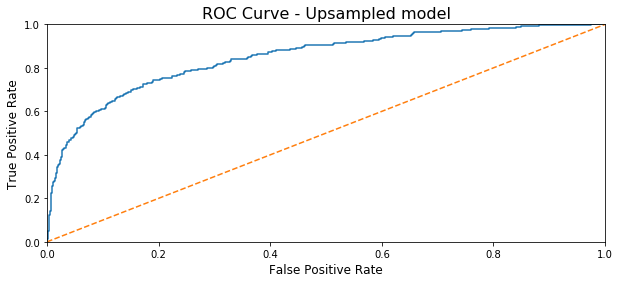

In [31]:
#ROC curve - Upsampled model.
probabilities_valid = model_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < write code here >

plt.figure(figsize=(10,4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Upsampled model', fontsize=16)
plt.show()

In [32]:
#Area Under Curve ROC score - Upsampled model
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:',auc_roc)

AUC ROC: 0.8492140134557826


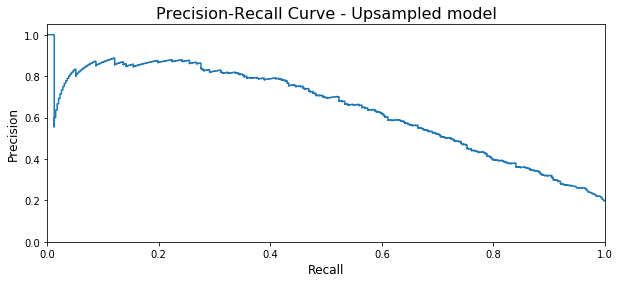

In [33]:
#Precision-Recall Curve.
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(10, 4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Upsampled model', fontsize=16)
plt.show() 

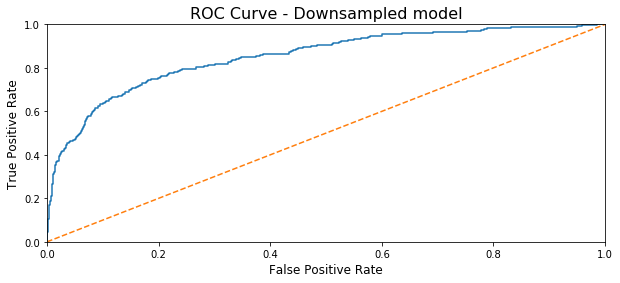

In [34]:
#ROC curve - Downsampled model
probabilities_valid = model_downsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < write code here >

plt.figure(figsize=(10,4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Downsampled model', fontsize=16)
plt.show()

In [35]:
#Area Under Curve ROC score - Downsampled model
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:',auc_roc)

AUC ROC: 0.8515850835230615


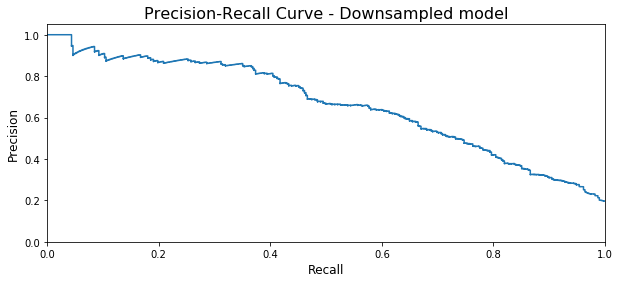

In [36]:
#Precision-Recall Curve.
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(10, 4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Downsampled model', fontsize=16)
plt.show() 

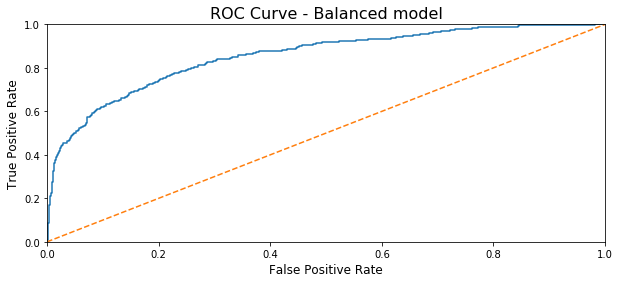

In [37]:
#ROC curve - Balanced model
probabilities_valid = model_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < write code here >

plt.figure(figsize=(10,4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Balanced model', fontsize=16)
plt.show()

In [38]:
#Area Under Curve ROC score - Balanced model
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC ROC:',auc_roc)

AUC ROC: 0.8538010667417053


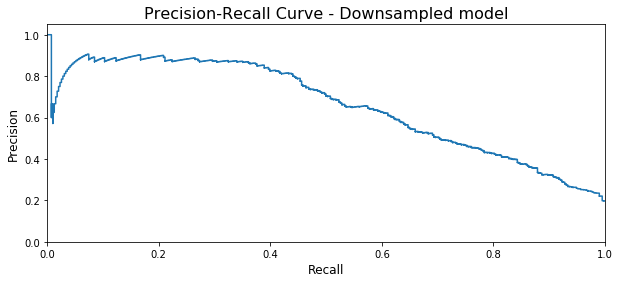

In [39]:
#Precision-Recall Curve.
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(10, 4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve - Downsampled model', fontsize=16)
plt.show() 

# Brief summarize. Improve the quality of the model.

I decided to choose three way to fix the class imbalance: upsampling, downsamplig and class_weight 'balanced'.
Without non that much efford, I was able to accomplish a 0.6 of f1 score for each of them. I choose to draw ROC curve and Precision-Recall curve for each of those models. Accomplishing an 84/85% of area under the ROC curve for each of them.

In this phase I decided to don't choose just one model, since I wanted to check in a better way the predictions of the models, drawing a confusion matrix for each of them. Since they looks like to be really similar, only the confusion matrix can tell us wich is better.

### Perform the final testing.

In [40]:
#Testing the models. - Upsampled model testing
upsampled_predictions_test = model_upsampled.predict(features_test)
print(f'Test: {model_upsampled.score(features_test, target_test):.3f}')
print(f'Train: {model_upsampled.score(features_train, target_train):.3f}')
print()
print('This model, obtained an 83,3% accuracy on test dataset, while 92,7% on the trained dataset.')

Test: 0.833
Train: 0.927

This model, obtained an 83,3% accuracy on test dataset, while 92,7% on the trained dataset.


In [41]:
#Testing the models. - Downsampled model testing
downsampled_predictions_test = model_downsampled.predict(features_test)
print(f'Test: {model_downsampled.score(features_test, target_test):.3f}')
print(f'Train: {model_downsampled.score(features_train, target_train):.3f}')
print()
print('This model, obtained an 85,7% accuracy on test dataset, while 91,4% on the trained dataset.')

Test: 0.857
Train: 0.914

This model, obtained an 85,7% accuracy on test dataset, while 91,4% on the trained dataset.


In [42]:
#Testing the models. - Balanced model testing
balanced_predictions_test = model_downsampled.predict(features_test)
print(f'Test: {model_balanced.score(features_test, target_test):.3f}')
print(f'Train: {model_balanced.score(features_train, target_train):.3f}')
print()
print('This model, obtained an 84,8% accuracy on test dataset, while 91,9% on the trained dataset.')

Test: 0.848
Train: 0.919

This model, obtained an 84,8% accuracy on test dataset, while 91,9% on the trained dataset.


In [43]:
#Creating a confusion matrice upsampled model.
print('Confusion Matrice - Upsampled model.')
print()
cm = confusion_matrix(target_test, upsampled_predictions_test)
print(cm)
print()
#Extracting TruePositive, FalsePositive, FalseNegative and TrueNegative from our confusion matrice.
tn, fn, fp, tp = confusion_matrix(target_test, upsampled_predictions_test).ravel()
print('True positive:', tp)
print('False positive:', fp)
print('False negative:', fn)
print('True negative:', tn)
print()
exact = tp + tn
wrong = fp + fn
print('Exact results=',exact)
print('Wrong results=',wrong)

Confusion Matrice - Upsampled model.

[[1401  192]
 [ 143  264]]

True positive: 264
False positive: 143
False negative: 192
True negative: 1401

Exact results= 1665
Wrong results= 335


In [44]:
#Creating a confusion matrice downsampled model.
print('Confusion Matrice - Downsampled model.')
print()
cm = confusion_matrix(target_test, downsampled_predictions_test)
print(cm)
print()
#Extracting TruePositive, FalsePositive, FalseNegative and TrueNegative from our confusion matrice.
tn, fn, fp, tp = confusion_matrix(target_test, downsampled_predictions_test).ravel()
print('True positive:', tp)
print('False positive:', fp)
print('False negative:', fn)
print('True negative:', tn)
print()
exact = tp + tn
wrong = fp + fn
print('Exact results=',exact)
print('Wrong results=',wrong)

Confusion Matrice - Downsampled model.

[[1491  102]
 [ 185  222]]

True positive: 222
False positive: 185
False negative: 102
True negative: 1491

Exact results= 1713
Wrong results= 287


In [45]:
#Creating a confusion matrice balanced model.
print('Confusion Matrice - Balanced model.')
print()
cm = confusion_matrix(target_test, balanced_predictions_test)
print(cm)
print()
#Extracting TruePositive, FalsePositive, FalseNegative and TrueNegative from our confusion matrice.
tn, fn, fp, tp = confusion_matrix(target_test, balanced_predictions_test).ravel()
print('True positive:', tp)
print('False positive:', fp)
print('False negative:', fn)
print('True negative:', tn)
print()
exact = tp + tn
wrong = fp + fn
print('Exact results=',exact)
print('Wrong results=',wrong)

Confusion Matrice - Balanced model.

[[1491  102]
 [ 185  222]]

True positive: 222
False positive: 185
False negative: 102
True negative: 1491

Exact results= 1713
Wrong results= 287


In [46]:
#Classification report. Upsampled model
report= classification_report(target_test, upsampled_predictions_test)
print('Classification report - Upsampled model: \n', report)

Classification report - Upsampled model: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1593
           1       0.58      0.65      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



In [47]:
#Classification report. Downsampled model
report= classification_report(target_test, downsampled_predictions_test)
print('Classification report - Downsampled model: \n', report)

Classification report - Downsampled model: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.55      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [48]:
#Classification report. Balanced model
report= classification_report(target_test, balanced_predictions_test)
print('Classification report - Balanced model: \n', report)

Classification report - Balanced model: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.55      0.61       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



# Brief summarize. Testing phase.

I tested all the models on test dataframe. This resulted into:
1) Upsampled model with Test: 0.833 and Train: 0.927 of accuracy.
2) Downsampled model with Test: 0.857 and Train: 0.914 of accuracy.
3) Balanced model with Test: 0.848 and Train: 0.919 of accuracy.

Drowing the confusion matrix for each of the model. Resulted into:
1) Upsampled model: True positive: 264, False positive: 143, False negative: 192, True negative: 1401
- Exact results= 1665 and Wrong results= 335

2) Downsampled model: True positive: 222, False positive: 185, False negative: 102, True negative: 1491
- Exact results= 1713, Wrong results= 287

3) Balanced model: True positive: 222, False positive: 185, False negative: 102, True negative: 1491
- Exact results= 1713, Wrong results= 287

I reported all the data and metrics related to the models in the end of my exercise. This returned three really similar models.
The first is probably the only one to discard. Since obtained more mistakes then the other two. The other two present a confusion matrix perfectly equal. I am quite satisfied of the obtained results. 287 mistakes on 2000 predictions. In my opinion, is quite a good result. 